<a href="https://colab.research.google.com/github/NishatVasker/University_Projects/blob/master/CSE303_version_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 36 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Variable        1 non-null      object 
 1   Gender          41 non-null     object 
 2   Age             41 non-null     object 
 3   Education       41 non-null     object 
 4   Occupation      41 non-null     object 
 5   City            41 non-null     object 
 6   Monthly_Income  41 non-null     object 
 7   PK1             41 non-null     object 
 8   PK2             41 non-null     object 
 9   PK3             41 non-null     object 
 10  PK4             41 non-null     object 
 11  CA1             41 non-null     object 
 12  CA2             41 non-null     object 
 13  CA3             41 non-null     object 
 14  CA4             41 non-null     object 
 15  EA1             41 non-null     object 
 16  EA2             41 non-null     object 
 17  EA3             41 non-null     objec

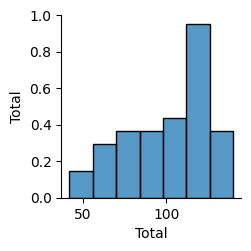

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



# Assuming your dataset is in a CSV file named 'your_dataset.csv'
df = pd.read_csv('/content/csv/DATA IN BRIEF -DATA.csv')



# Display basic information about the dataset
df.info()

# Display summary statistics
df.describe()

# Check for missing values
df.isnull().sum()

# Visualize data distribution
sns.pairplot(df)
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



# Assuming your dataset is in a CSV file named 'your_dataset.csv'
df = pd.read_csv('/content/csv/Scale Development and Item generation.csv')



# Display basic information about the dataset
df.info()

# Display summary statistics
df.describe()

# Check for missing values
df.isnull().sum()

# Visualize data distribution
sns.pairplot(df)
plt.show()


/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


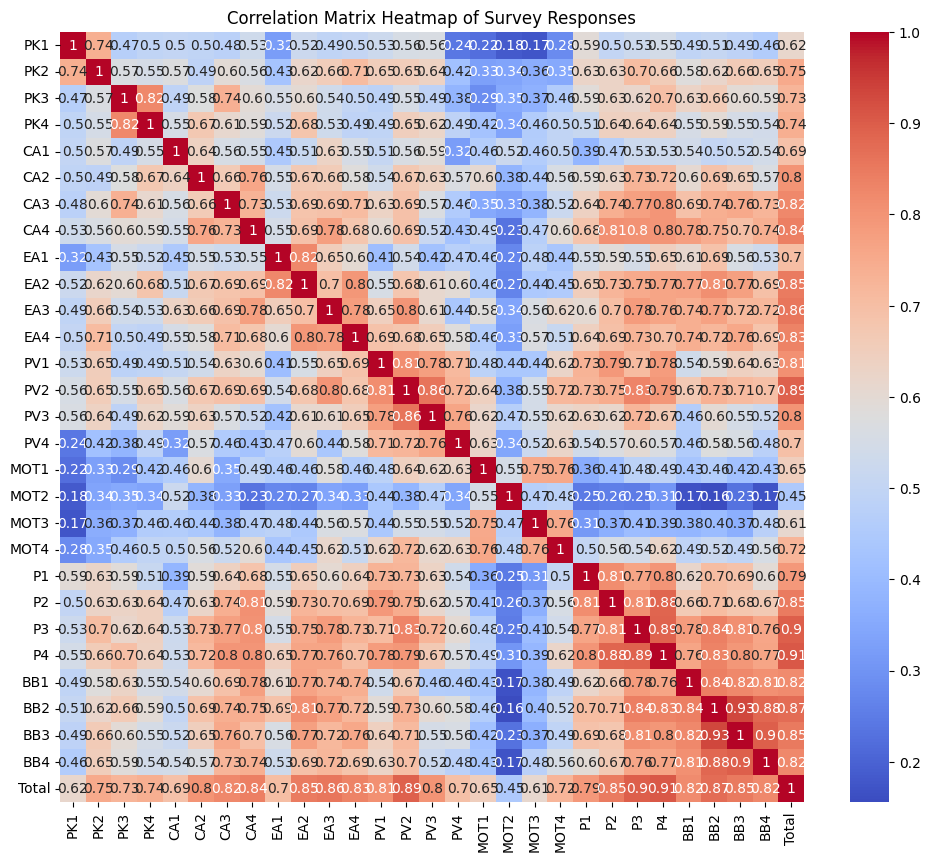

                            OLS Regression Results                            
Dep. Variable:                    BB1   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     7.733
Date:                Thu, 07 Dec 2023   Prob (F-statistic):           0.000321
Time:                        15:38:31   Log-Likelihood:                -5.9087
No. Observations:                  40   AIC:                             67.82
Df Residuals:                      12   BIC:                             115.1
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3869      0.666     -0.581      0.5

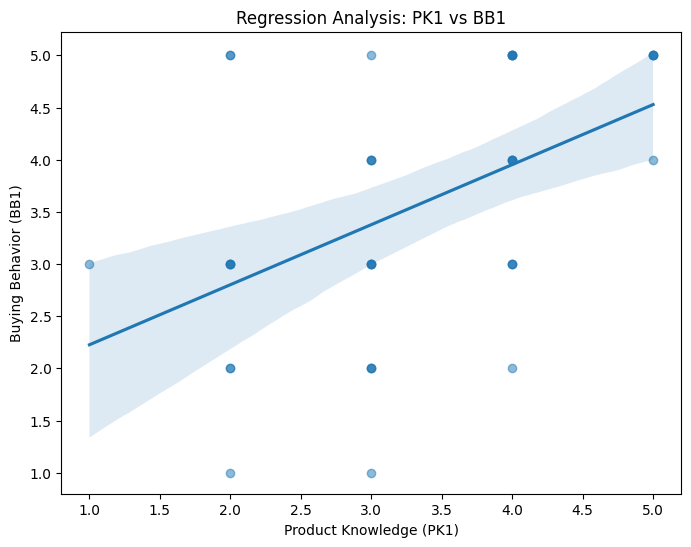

                            OLS Regression Results                            
Dep. Variable:                    BB1   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     7.733
Date:                Thu, 07 Dec 2023   Prob (F-statistic):           0.000321
Time:                        15:38:31   Log-Likelihood:                -5.9087
No. Observations:                  40   AIC:                             67.82
Df Residuals:                      12   BIC:                             115.1
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3869      0.666     -0.581      0.5

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4133: DegenerateDataWarning: at least one input has length 0
  warnings.warn(stats.DegenerateDataWarning('at least one input '


In [ ]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, f_oneway
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
file_path = '/content/DATA IN BRIEF -DATA.xlsx'
survey_data = pd.read_excel(file_path)

# Convert survey responses to numeric for analysis
response_columns = survey_data.columns[7:]  # Assuming survey responses start from the 8th column
for col in response_columns:
    survey_data[col] = pd.to_numeric(survey_data[col], errors='coerce')

# Correlation Analysis
# Calculate correlations for all pairs of survey response variables
correlation_matrix = survey_data[response_columns].corr()

# Creating a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap of Survey Responses')
plt.show()

# Regression Analysis
# Example: Predicting 'BB1' from 'PK1', 'CA1', 'EA1', etc.
y = survey_data['BB1'].dropna()
X = survey_data[['PK1', 'PK2', 'PK3', 'PK4', 'CA1', 'CA2', 'CA3', 'CA4', 'EA1', 'EA2',
       'EA3', 'EA4', 'PV1', 'PV2', 'PV3', 'PV4', 'MOT1', 'MOT2', 'MOT3',
       'MOT4', 'P1', 'P2', 'P3', 'P4', 'BB2', 'BB3', 'BB4']].dropna()  # Removed 'BB1' from X as this is feature
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

# Displaying the regression summary table
print(model.summary())


# Plotting the regression results for 'PK1'
plt.figure(figsize=(8, 6))
sns.regplot(x='PK1', y='BB1', data=survey_data, scatter_kws={'alpha':0.5})
plt.title('Regression Analysis: PK1 vs BB1')
plt.xlabel('Product Knowledge (PK1)')
plt.ylabel('Buying Behavior (BB1)')
plt.show()

# Displaying the regression summary table
print(model.summary())

# ANOVA Analysis across Age groups for 'BB1'
anova_result = f_oneway(*[survey_data[survey_data['Age'] == age]['BB1'].dropna() for age in survey_data['Age'].unique() if not pd.isna(age)])

# Printing the ANOVA results
print(f"ANOVA F-statistic: {anova_result.statistic}")
print(f"ANOVA P-value: {anova_result.pvalue}")

# Machine Learning Model: Decision Tree Classifier
# Predicting 'BB1' using multiple features
features = ['PK1', 'CA1', 'EA1', 'PV1', 'MOT1', 'P1']
X = survey_data[features].dropna()
y = survey_data.loc[X.index, 'BB1']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Printing the accuracy of the Decision Tree model
print(f"Accuracy of the Decision Tree model: {accuracy}")


/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


Descriptive Statistics:
             PK1        PK2        PK3        PK4        CA1       CA2  \
count  40.000000  40.000000  40.000000  40.000000  40.000000  40.00000   
mean    3.300000   3.400000   3.725000   3.875000   3.300000   3.57500   
std     1.042679   0.871191   0.905468   1.017476   1.343551   1.19588   
min     1.000000   2.000000   2.000000   1.000000   1.000000   1.00000   
25%     2.750000   3.000000   3.000000   3.000000   2.000000   3.00000   
50%     3.000000   3.000000   4.000000   4.000000   3.000000   4.00000   
75%     4.000000   4.000000   4.000000   5.000000   5.000000   5.00000   
max     5.000000   5.000000   5.000000   5.000000   5.000000   5.00000   

             CA3        CA4        EA1        EA2  ...       MOT4         P1  \
count  40.000000  40.000000  40.000000  40.000000  ...  40.000000  40.000000   
mean    3.525000   3.750000   3.600000   3.600000  ...   3.625000   3.425000   
std     1.260596   1.149136   1.057331   1.256777  ...   1.169867   1

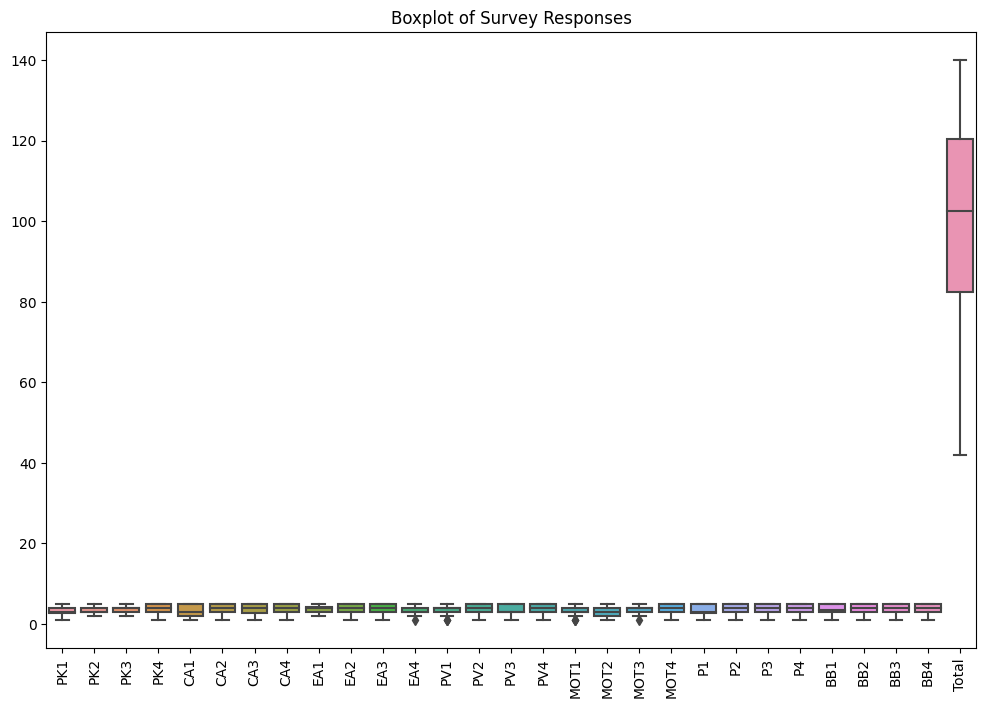

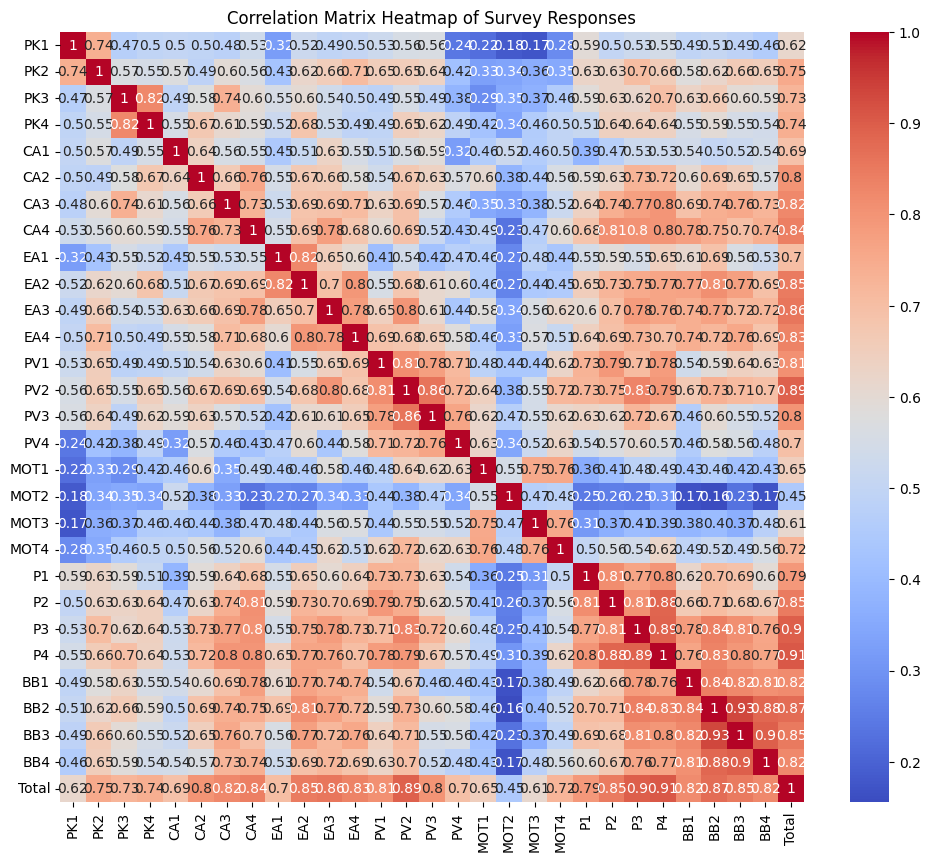

Regression Analysis Summary:
                            OLS Regression Results                            
Dep. Variable:                    BB1   R-squared:                       0.531
Model:                            OLS   Adj. R-squared:                  0.462
Method:                 Least Squares   F-statistic:                     7.701
Date:                Thu, 07 Dec 2023   Prob (F-statistic):           6.26e-05
Time:                        15:43:16   Log-Likelihood:                -49.009
No. Observations:                  40   AIC:                             110.0
Df Residuals:                      34   BIC:                             120.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0941  

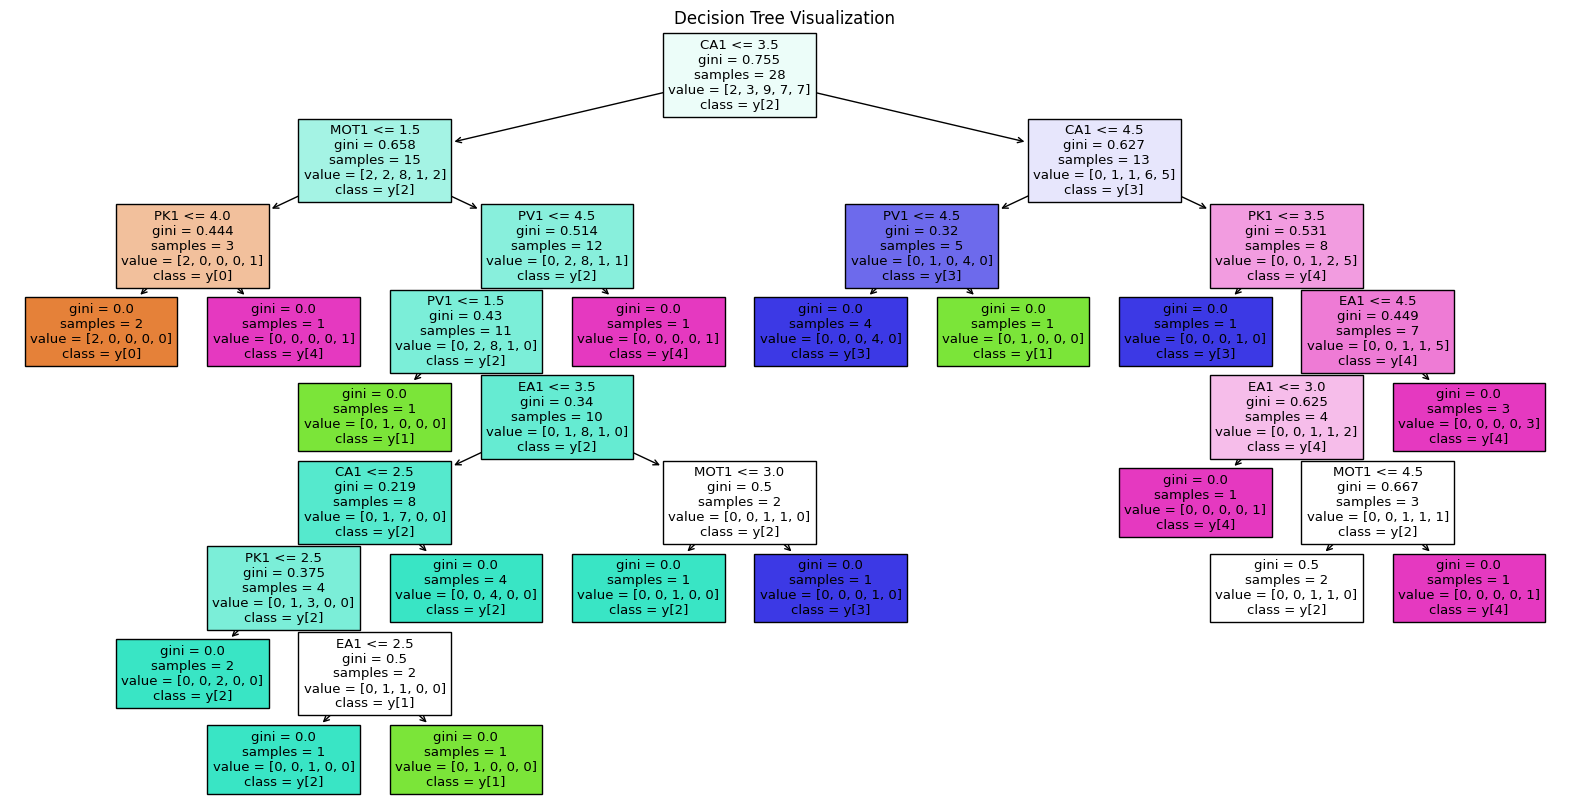

In [ ]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, f_oneway, chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
file_path = '/content/DATA IN BRIEF -DATA.xlsx'
survey_data = pd.read_excel(file_path)

# Convert survey responses to numeric for analysis
response_columns = survey_data.columns[7:]  # Assuming survey responses start from the 8th column
for col in response_columns:
    survey_data[col] = pd.to_numeric(survey_data[col], errors='coerce')

# Descriptive Statistics
print("Descriptive Statistics:")
print(survey_data.describe())

# Boxplots for Variable Distributions
plt.figure(figsize=(12, 8))
sns.boxplot(data=survey_data[response_columns])
plt.title('Boxplot of Survey Responses')
plt.xticks(rotation=90)
plt.show()

# Correlation Analysis with Heatmap
correlation_matrix = survey_data[response_columns].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap of Survey Responses')
plt.show()

# Regression Analysis
# Predicting 'BB1' from selected variables
y = survey_data['BB1'].dropna()
X = survey_data[['PK1', 'CA1', 'EA1', 'PV1', 'MOT1']].dropna()
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print("Regression Analysis Summary:")
print(model.summary())

# Decision Tree Model with Visualization
features = ['PK1', 'CA1', 'EA1', 'PV1', 'MOT1']
X = survey_data[features].dropna()
y = survey_data.loc[X.index, 'BB1']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Decision Tree Model Performance:")
print(classification_report(y_test, y_pred))

# Plotting the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=features, class_names=True, filled=True)
plt.title('Decision Tree Visualization')
plt.show()


In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 5.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import shap

# Load the dataset
file_path = '/content/DATA IN BRIEF -DATA.xlsx'
survey_data = pd.read_excel(file_path)

# Convert survey responses to numeric
# Assuming responses start from the 8th column and are in a Likert scale format
response_columns = survey_data.columns[7:]
survey_data[response_columns] = survey_data[response_columns].apply(pd.to_numeric, errors='coerce')

# Selecting a subset of features for the model
features = ['PK1', 'CA1', 'EA1', 'PV1', 'MOT1']
X = survey_data[features].dropna()
y = survey_data.loc[X.index, 'BB1']

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Training a Decision Tree model
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Initialize SHAP Explainer
explainer = shap.Explainer(clf, X_train)

# Calculate SHAP values for the test set
shap_values = explainer(X_test)

# Correct way to use force_plot in SHAP v0.20 and later
shap.initjs()  # Initialize JavaScript visualization in Jupyter Notebook
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test.iloc[0])


Workbook contains no default style, apply openpyxl's default


ValueError: ignored

/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


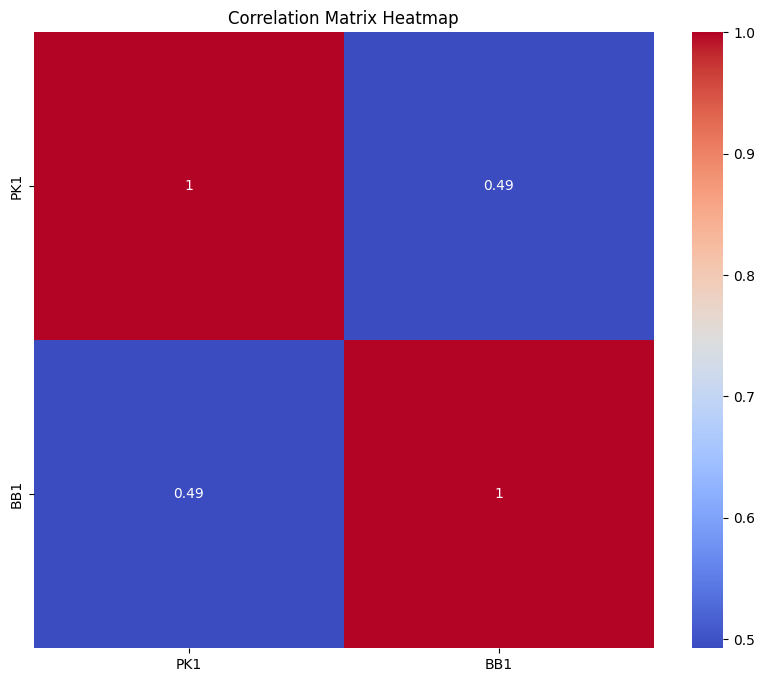

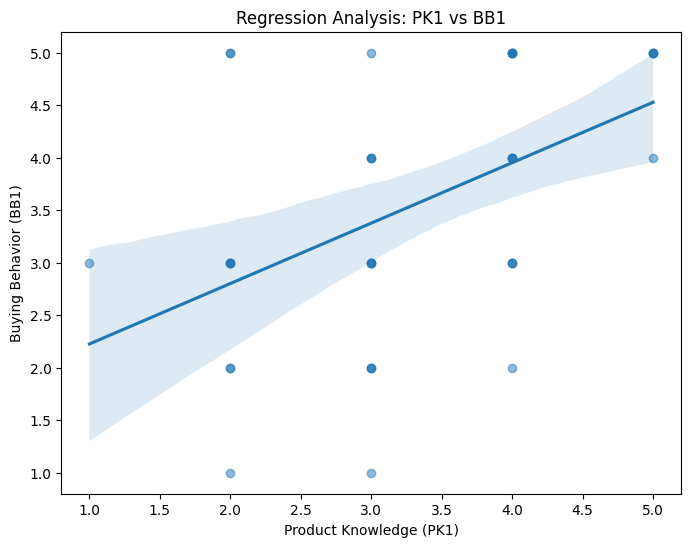

                            OLS Regression Results                            
Dep. Variable:                    BB1   R-squared:                       0.243
Model:                            OLS   Adj. R-squared:                  0.223
Method:                 Least Squares   F-statistic:                     12.17
Date:                Thu, 07 Dec 2023   Prob (F-statistic):            0.00125
Time:                        15:23:00   Log-Likelihood:                -58.599
No. Observations:                  40   AIC:                             121.2
Df Residuals:                      38   BIC:                             124.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6509      0.570      2.895      0.0

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, f_oneway
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Loading the dataset
file_path_converted = '/content/DATA IN BRIEF -DATA.xlsx'
survey_data = pd.read_excel(file_path_converted)

# Preprocessing: converting relevant columns to numeric for analysis
numeric_columns = ['PK1', 'BB1']  # Add more columns as needed
for col in numeric_columns:
    survey_data[col] = pd.to_numeric(survey_data[col], errors='coerce')

# Correlation Analysis
# Selecting a subset of variables for correlation
subset = survey_data[numeric_columns]
correlation_matrix = subset.corr()

# Creating a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

# Regression Analysis
y = survey_data['BB1'].dropna()
X = survey_data.loc[y.index, 'PK1']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

# Plotting the regression results
plt.figure(figsize=(8, 6))
sns.regplot(x='PK1', y='BB1', data=survey_data, scatter_kws={'alpha':0.5})
plt.title('Regression Analysis: PK1 vs BB1')
plt.xlabel('Product Knowledge (PK1)')
plt.ylabel('Buying Behavior (BB1)')
plt.show()

# Displaying the regression summary table
print(model.summary())

# ANOVA Analysis
unique_ages = survey_data['Age'].dropna().unique()
groups = [survey_data[survey_data['Age'] == age]['BB1'].dropna() for age in unique_ages if age != 'What is your age?']
anova_result = f_oneway(*groups)

# Printing the ANOVA results
print(f"ANOVA F-statistic: {anova_result.statistic}")
print(f"ANOVA P-value: {anova_result.pvalue}")

# Machine Learning Model: Decision Tree Classifier
# Predicting 'BB1' using 'PK1' (simplified model)
X = survey_data[['PK1']].dropna()
y = survey_data.loc[X.index, 'BB1']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy of the Decision Tree model: {accuracy}")

